In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('NBA_Dataset_csv.csv')

In [3]:
data.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [4]:
data.shape

(159, 7)

In [5]:
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [7]:
df = data.rename(columns={'Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga','Laps_Run_Per_Practice_Average':'Laps',
                          'Water_Intake':'WI','Players_Absent_For_Sessions':'PAFS'})

In [8]:
df.head()

,Team,Points_Scored,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


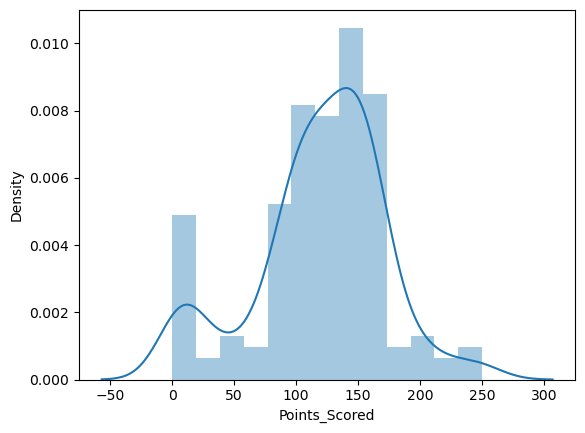

In [12]:
#Distplot
ax= sns.distplot(df.Points_Scored)

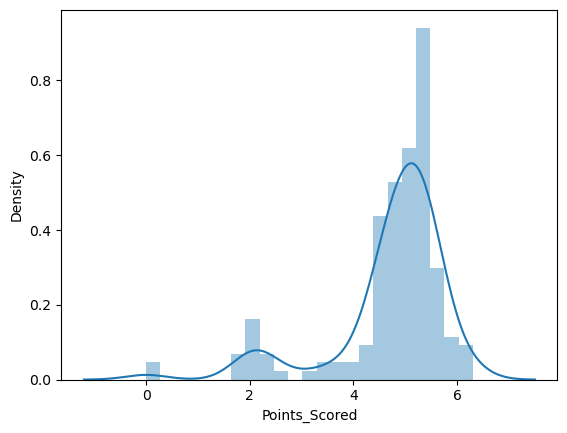

In [16]:
ax= sns.distplot(np.cbrt(df.Points_Scored))

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Points_Scored'>

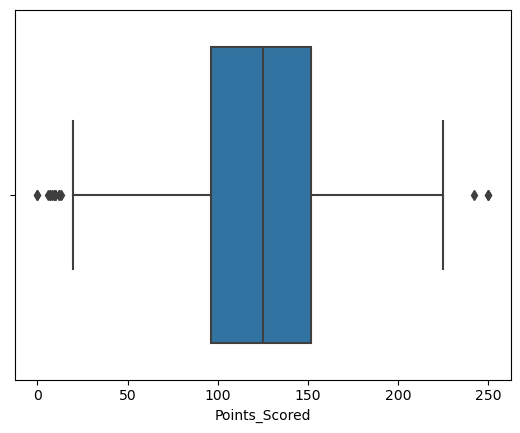

In [17]:
sns.boxplot(df.Points_Scored)

In [32]:
#we have outliers in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           159 non-null    object 
 1   Points_Scored  159 non-null    int64  
 2   WL             150 non-null    float64
 3   Yoga           139 non-null    float64
 4   Laps           145 non-null    float64
 5   WI             145 non-null    float64
 6   PAFS           130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [43]:
#violin plot
def plotting_box_violin_plots(df,x,y):
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle("Violin and box plots for variable :{}".format(y))

    sns.violinplot(ax=axes[0],x=x, y=y , data=df)
    sns.boxplot(ax= axes[1], data= df[y])

    axes[0].set_title("Violin plot for variable: {}".format(y))
    axes[1].set_title("Boxplot for variable : {}".format(y))

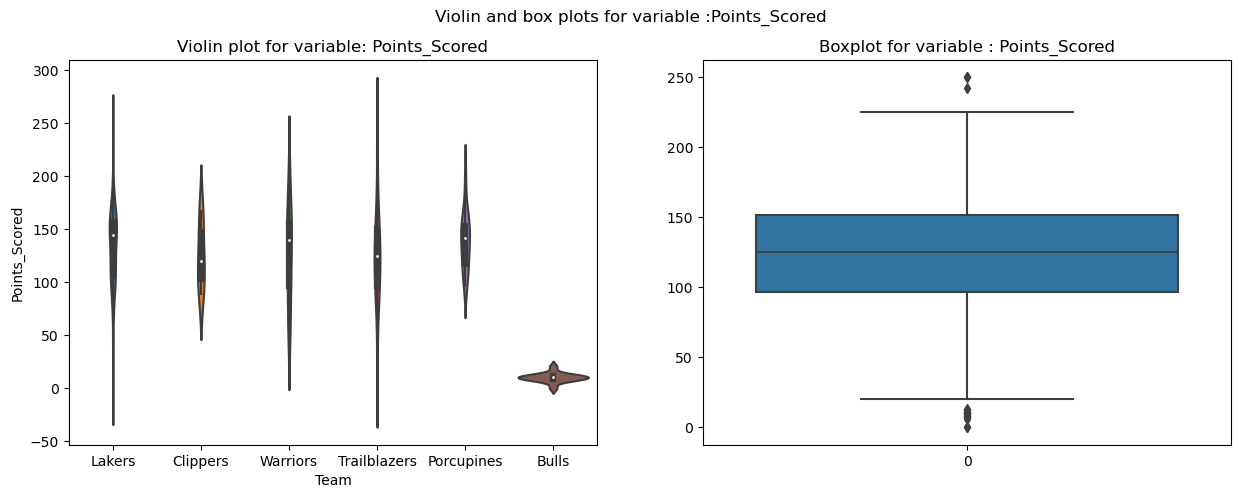

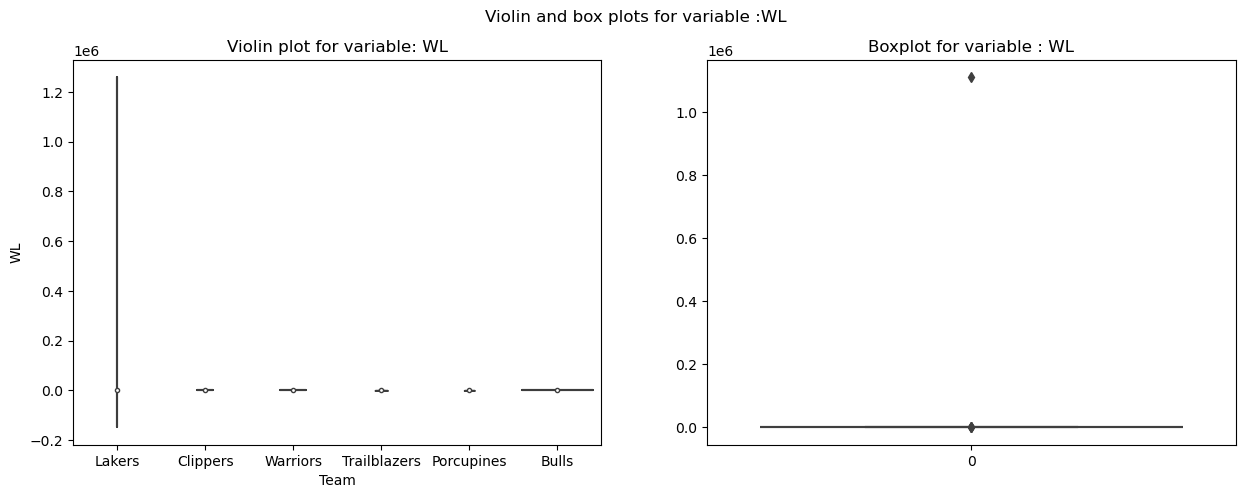

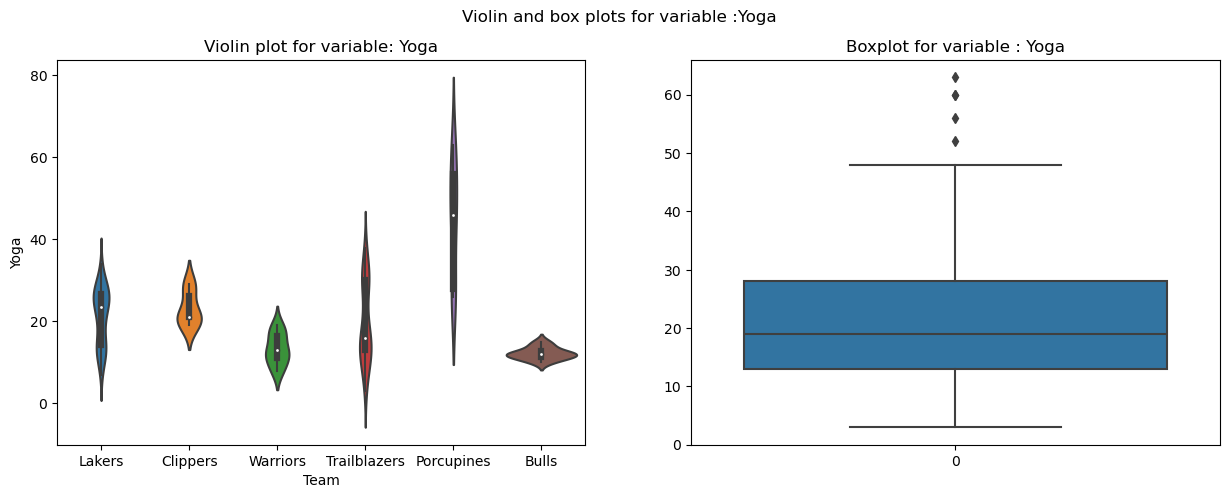

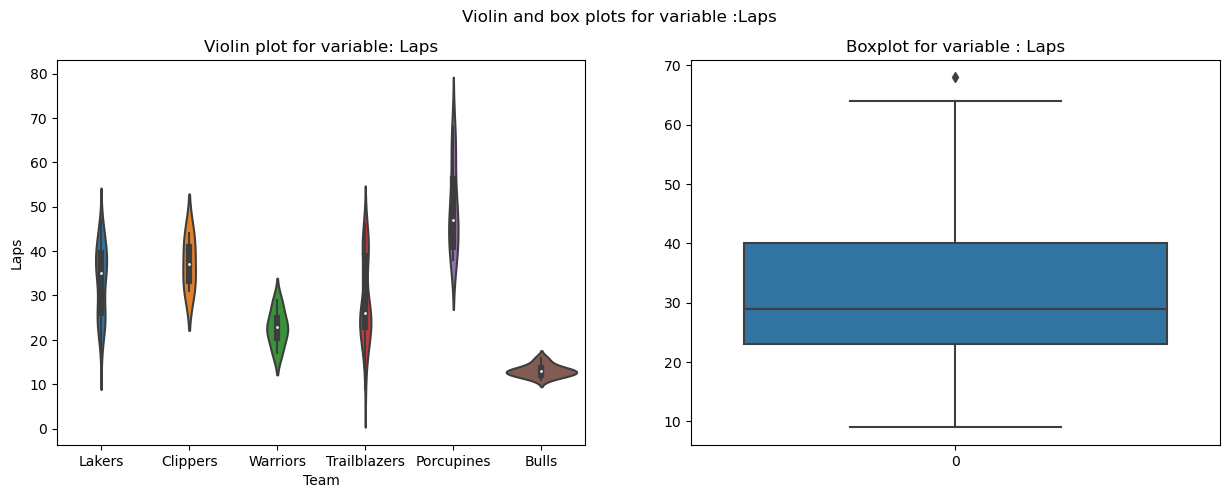

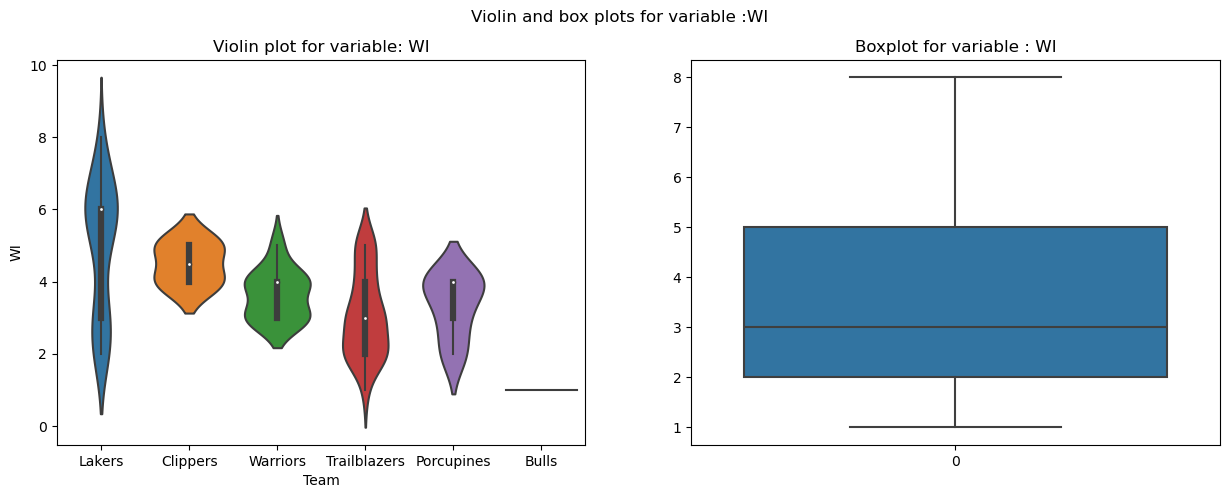

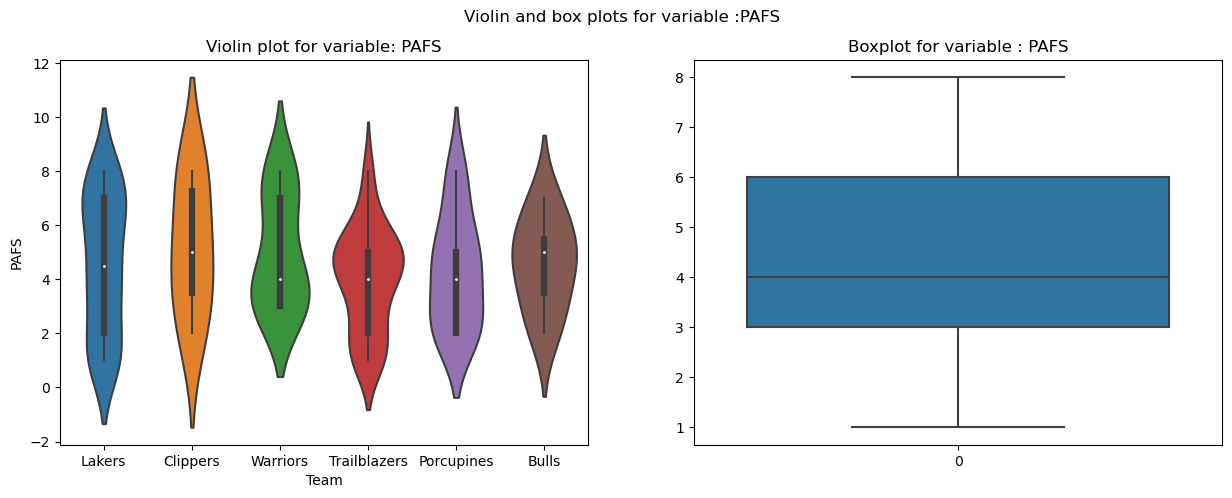

In [44]:
for i in ['Points_Scored','WL','Yoga','Laps','WI','PAFS']:
    plotting_box_violin_plots(df,"Team",i)

In [52]:
def find_outliers(df , column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    upper_bound = Q3 +1.5 * IQR
    lower_bound = Q1 - 1.5*IQR
    outlier = df[column][(df[column] >upper_bound) | (df[column] <lower_bound)]
    return outlier
    

In [53]:
for i in ['Points_Scored','WL','Yoga','Laps','WI','PAFS']:
    outlier =find_outliers(df , i)
    print(outlier)

0      242
40       0
72       6
105    250
106    250
145      7
146      8
147      7
148     10
149     10
150      9
151     10
152     10
153     10
154     12
155     13
156     12
158      0
Name: Points_Scored, dtype: int64
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64
144    68.0
Name: Laps, dtype: float64
Series([], Name: WI, dtype: float64)
Series([], Name: PAFS, dtype: float64)


In [54]:
# at 144 all the column outlier so it can be dropped
# 142 and 143 can also be dropped
# 8 can be replaced with Median




In [55]:
df_clean = df.drop([142,143,144])

In [56]:
df_clean.shape

(156, 7)

In [67]:
df_clean['WL'].iloc[8]=np.nan

C:\Users\user\AppData\Local\Temp\ipykernel_19732\69910254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WL'].iloc[8]=np.nan


In [68]:
#Missing Value Imputation Technique

In [71]:
ncounts = pd.DataFrame([df_clean.isna().mean()]).T

In [72]:
ncounts

,0
Team,0.000000
Points_Scored,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<Axes: title={'center': '% of missing values across each column'}>

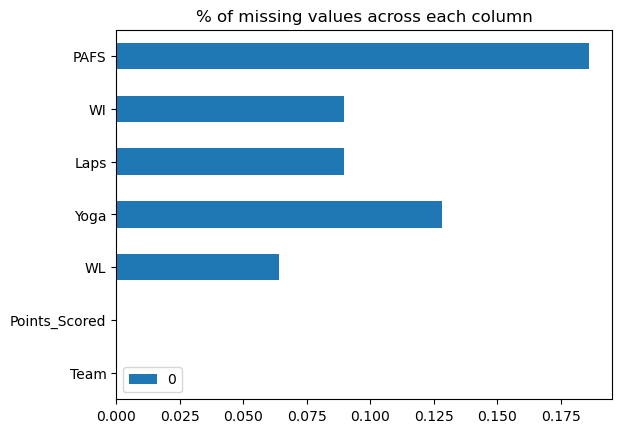

In [74]:
ncounts.plot(kind='barh', title='% of missing values across each column')

In [75]:
####Missing Imputation
# 1. Drop missing values
# 2. Pandas : F fill and B Fill
# 3. sklearn : Imputer
# 4. LGBM: to fill missing values

In [76]:
df_clean.shape , df_clean.dropna().shape

((156, 7), (94, 7))

In [77]:
#40 % of drop, not good

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           156 non-null    object 
 1   Points_Scored  156 non-null    int64  
 2   WL             146 non-null    float64
 3   Yoga           136 non-null    float64
 4   Laps           142 non-null    float64
 5   WI             142 non-null    float64
 6   PAFS           127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


C:\Users\user\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

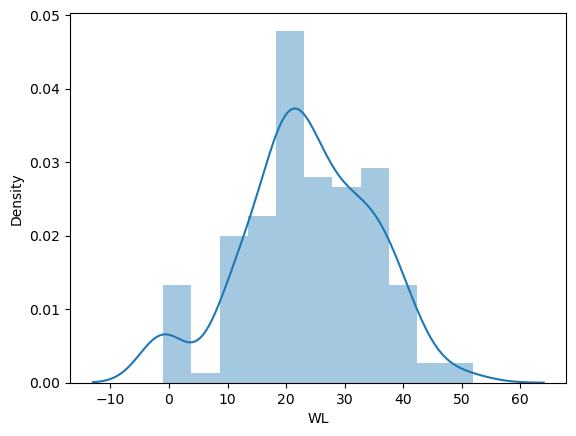

In [83]:
sns.distplot(df_clean['WL'].fillna(-1))

C:\Users\user\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

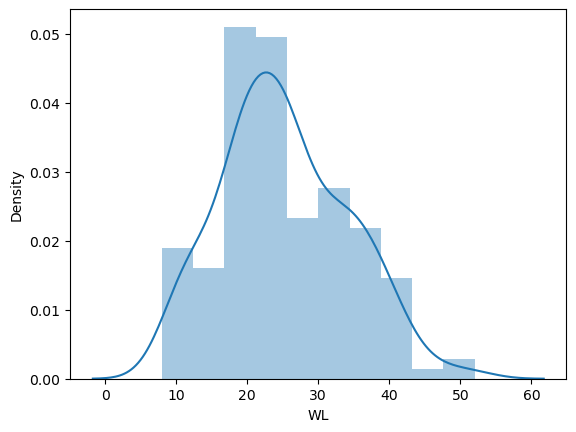

In [85]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))

C:\Users\user\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

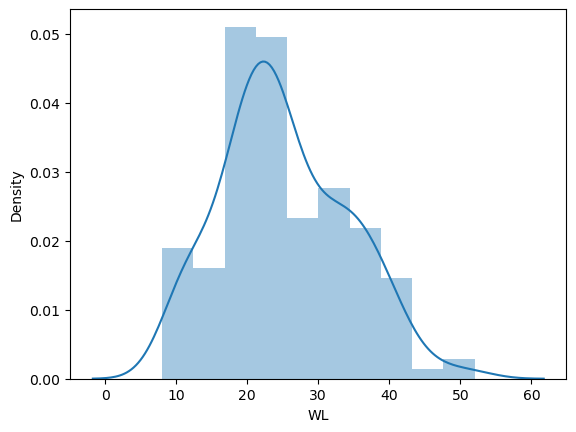

In [86]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))